<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/Reuters_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 1s 0us/step
8982
2246
46


In [2]:
word_index = reuters.get_word_index()
# word_index
idx = 0
for key, value in word_index.items():
    print(f'{key}: {value}') # 해당 단어의 빈도수 출력
    idx +=1
    if idx >= 10:
        break

550378/550378 [==============================] - 0s 1us/step
mdbl: 10996
fawc: 16260
degussa: 12089
woods: 8803
hanging: 13796
localized: 20672
sation: 20673
chanthaburi: 20675
refunding: 10997
hermann: 8804


In [3]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word
idx = 0
for key, value in index_word.items():
    print(f'{key}: {value}')
    idx +=1
    if idx >= 10:
        break

index_word[1]

10996: mdbl
16260: fawc
12089: degussa
8803: woods
13796: hanging
20672: localized
20673: sation
20675: chanthaburi
10997: refunding
8804: hermann


'the'

In [4]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [6]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1. # d가 [3, 5, 7]과 같은 리스트라면, results[i, 3], results[i, 5], results[i, 7] 위치에 1이 할당
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [10]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 3s 124ms/step - loss: 2.2616 - accuracy: 0.5385 - val_loss: 1.4803 - val_accuracy: 0.6647
Epoch 2/40
18/18 [==============================] - 2s 117ms/step - loss: 1.2031 - accuracy: 0.7344 - val_loss: 1.1901 - val_accuracy: 0.7364
Epoch 3/40
18/18 [==============================] - 2s 132ms/step - loss: 0.8935 - accuracy: 0.8041 - val_loss: 1.0523 - val_accuracy: 0.7618
Epoch 4/40
18/18 [==============================] - 2s 94ms/step - loss: 0.6866 - accuracy: 0.8490 - val_loss: 0.9897 - val_accuracy: 0.7716
Epoch 5/40
18/18 [==============================] - 2s 94ms/step - loss: 0.5381 - accuracy: 0.8841 - val_loss: 0.9381 - val_accuracy: 0.7850
Epoch 6/40
18/18 [==============================] - 2s 95ms/step - loss: 0.4315 - accuracy: 0.9054 - val_loss: 0.9234 - val_accuracy: 0.7818
Epoch 7/40
18/18 [==============================] - 2s 85ms/step - loss: 0.3554 - accuracy: 0.9193 - val_loss: 0.8755 - val_accuracy: 0.8005
Epoch 8/40

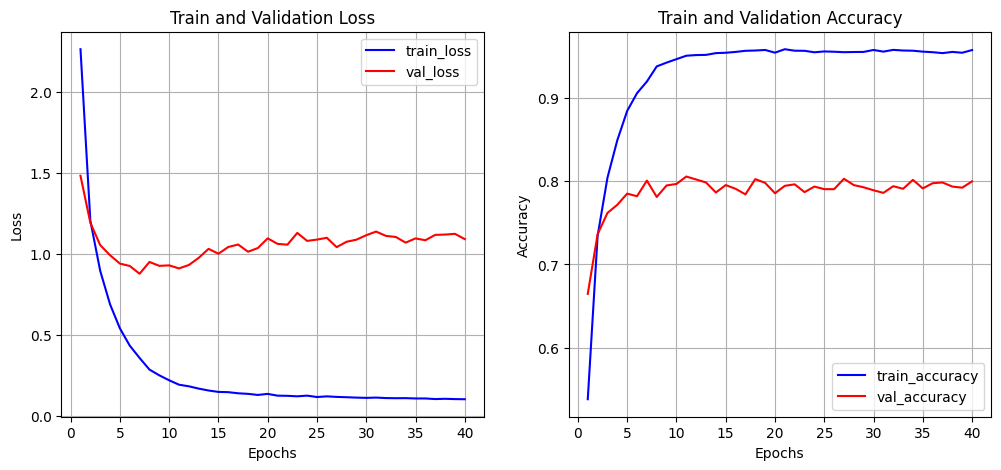

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [16]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

In [18]:
from tensorflow.keras import initializers, activations
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 3s 127ms/step - loss: 3.8104 - accuracy: 0.0886 - val_loss: 3.7957 - val_accuracy: 0.0467
Epoch 2/40
18/18 [==============================] - 2s 97ms/step - loss: 3.7843 - accuracy: 0.1765 - val_loss: 3.7728 - val_accuracy: 0.2110
Epoch 3/40
18/18 [==============================] - 2s 85ms/step - loss: 3.7616 - accuracy: 0.2287 - val_loss: 3.7506 - val_accuracy: 0.2110
Epoch 4/40
18/18 [==============================] - 2s 92ms/step - loss: 3.7393 - accuracy: 0.2170 - val_loss: 3.7289 - val_accuracy: 0.2110
Epoch 5/40
18/18 [==============================] - 2s 131ms/step - loss: 3.7172 - accuracy: 0.2268 - val_loss: 3.7072 - val_accuracy: 0.2110
Epoch 6/40
18/18 [==============================] - 2s 111ms/step - loss: 3.6952 - accuracy: 0.2876 - val_loss: 3.6857 - val_accuracy: 0.2110
Epoch 7/40
18/18 [==============================] - 2s 92ms/step - loss: 3.6734 - accuracy: 0.2454 - val_loss: 3.6643 - val_accuracy: 0.2110
Epoch 8/40

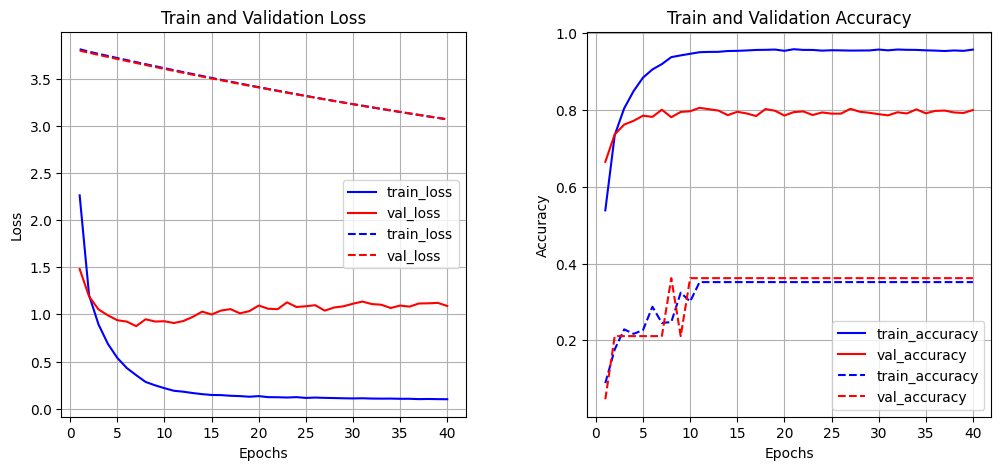

In [19]:
diff_history(history, zero_history)

In [20]:
normal_history = build_model(initializers.RandomNormal())

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 3s 145ms/step - loss: 2.4202 - accuracy: 0.4870 - val_loss: 1.7537 - val_accuracy: 0.5984
Epoch 2/40
18/18 [==============================] - 2s 85ms/step - loss: 1.4830 - accuracy: 0.6658 - val_loss: 1.4217 - val_accuracy: 0.6817
Epoch 3/40
18/18 [==============================] - 2s 94ms/step - loss: 1.1896 - accuracy: 0.7292 - val_loss: 1.2564 - val_accuracy: 0.7124
Epoch 4/40
18/18 [==============================] - 2s 94ms/step - loss: 0.9727 - accuracy: 0.7809 - val_loss: 1.1583 - val_accuracy: 0.7373
Epoch 5/40
18/18 [==============================] - 2s 109ms/step - loss: 0.8063 - accuracy: 0.8167 - val_loss: 1.1108 - val_accuracy: 0.7453
Epoch 6/40
18/18 [==============================] - 2s 134ms/step - loss: 0.6666 - accuracy: 0.8467 - val_loss: 1.0450 - val_accuracy: 0.7551
Epoch 7/40
18/18 [==============================] - 2s 86ms/step - loss: 0.5518 - accuracy: 0.8752 - val_loss: 1.0307 - val_accuracy: 0.7663
Epoch 8/40

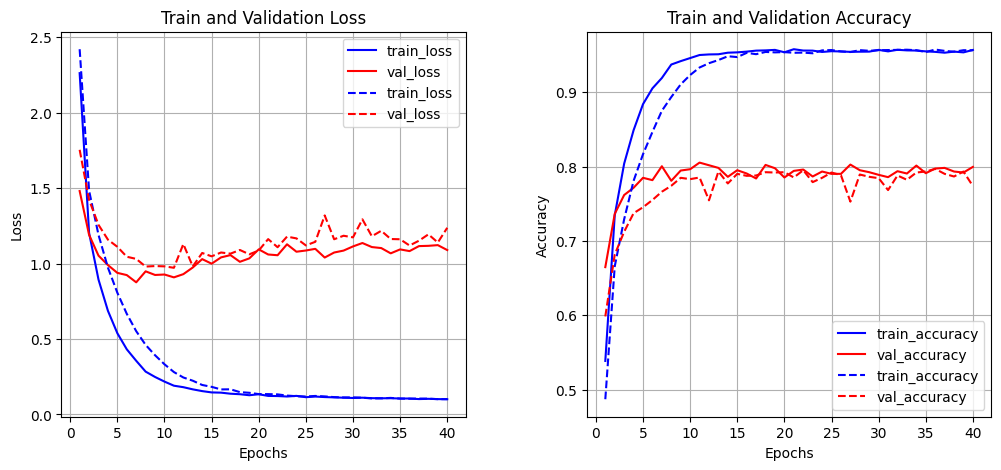

In [21]:
diff_history(history, normal_history)

In [22]:
glorot_history = build_model(initializers.GlorotNormal())

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 2s 106ms/step - loss: 2.3153 - accuracy: 0.5301 - val_loss: 1.5101 - val_accuracy: 0.6679
Epoch 2/40
18/18 [==============================] - 2s 114ms/step - loss: 1.2394 - accuracy: 0.7256 - val_loss: 1.2441 - val_accuracy: 0.7333
Epoch 3/40
18/18 [==============================] - 3s 145ms/step - loss: 0.9392 - accuracy: 0.7946 - val_loss: 1.1324 - val_accuracy: 0.7418
Epoch 4/40
18/18 [==============================] - 2s 86ms/step - loss: 0.7311 - accuracy: 0.8424 - val_loss: 0.9936 - val_accuracy: 0.7734
Epoch 5/40
18/18 [==============================] - 2s 96ms/step - loss: 0.5618 - accuracy: 0.8821 - val_loss: 0.9432 - val_accuracy: 0.7912
Epoch 6/40
18/18 [==============================] - 2s 96ms/step - loss: 0.4400 - accuracy: 0.9071 - val_loss: 0.9083 - val_accuracy: 0.7930
Epoch 7/40
18/18 [==============================] - 2s 87ms/step - loss: 0.3519 - accuracy: 0.9237 - val_loss: 0.9452 - val_accuracy: 0.7832
Epoch 8/40

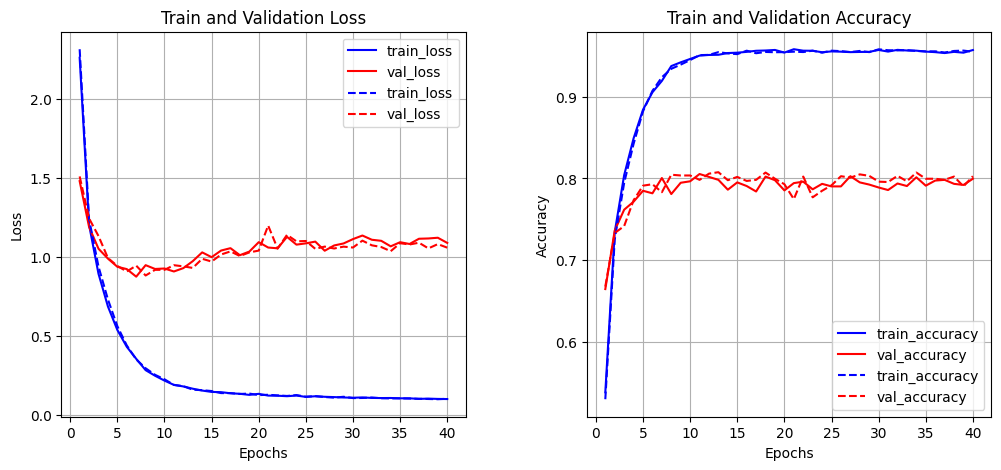

In [23]:
diff_history(history, glorot_history)

In [24]:
he_history = build_model(initializers.HeNormal())

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 3s 112ms/step - loss: 2.1288 - accuracy: 0.5784 - val_loss: 1.3896 - val_accuracy: 0.6932
Epoch 2/40
18/18 [==============================] - 2s 95ms/step - loss: 1.1102 - accuracy: 0.7564 - val_loss: 1.1559 - val_accuracy: 0.7337
Epoch 3/40
18/18 [==============================] - 2s 94ms/step - loss: 0.7940 - accuracy: 0.8260 - val_loss: 0.9891 - val_accuracy: 0.7752
Epoch 4/40
18/18 [==============================] - 1s 84ms/step - loss: 0.5739 - accuracy: 0.8802 - val_loss: 0.9226 - val_accuracy: 0.7845
Epoch 5/40
18/18 [==============================] - 2s 85ms/step - loss: 0.4412 - accuracy: 0.9060 - val_loss: 0.8900 - val_accuracy: 0.7970
Epoch 6/40
18/18 [==============================] - 2s 87ms/step - loss: 0.3542 - accuracy: 0.9218 - val_loss: 0.8932 - val_accuracy: 0.8032
Epoch 7/40
18/18 [==============================] - 3s 149ms/step - loss: 0.2726 - accuracy: 0.9408 - val_loss: 0.9145 - val_accuracy: 0.7965
Epoch 8/40


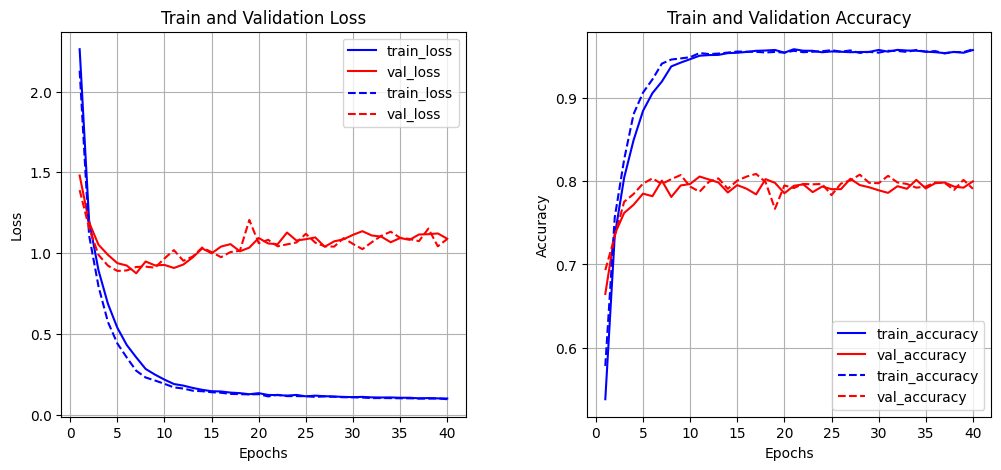

In [25]:
diff_history(history, he_history)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 3s 117ms/step - loss: 2.3016 - accuracy: 0.5608 - val_loss: 1.4974 - val_accuracy: 0.6848
Epoch 2/40
18/18 [==============================] - 2s 90ms/step - loss: 1.2233 - accuracy: 0.7326 - val_loss: 1.3151 - val_accuracy: 0.6946
Epoch 3/40
18/18 [==============================] - 2s 93ms/step - loss: 0.9215 - accuracy: 0.8000 - val_loss: 1.0956 - val_accuracy: 0.7533
Epoch 4/40
18/18 [==============================] - 2s 85ms/step - loss: 0.7019 - accuracy: 0.8487 - val_loss: 1.0140 - val_accuracy: 0.7743
Epoch 5/40
18/18 [==============================] - 2s 122ms/step - loss: 0.5507 - accuracy: 0.8844 - val_loss: 1.0102 - val_accuracy: 0.7627
Epoch 6/40
18/18 [==============================] - 2s 121ms/step - loss: 0.4357 - accuracy: 0.9069 - val_loss: 0.9152 - val_accuracy: 0.7943
Epoch 7/40
18/18 [==============================] - 2s 85ms/step - loss: 0.3430 - accuracy: 0.9283 - val_loss: 0.8976 - val_accuracy: 0.7979
Epoch 8/40

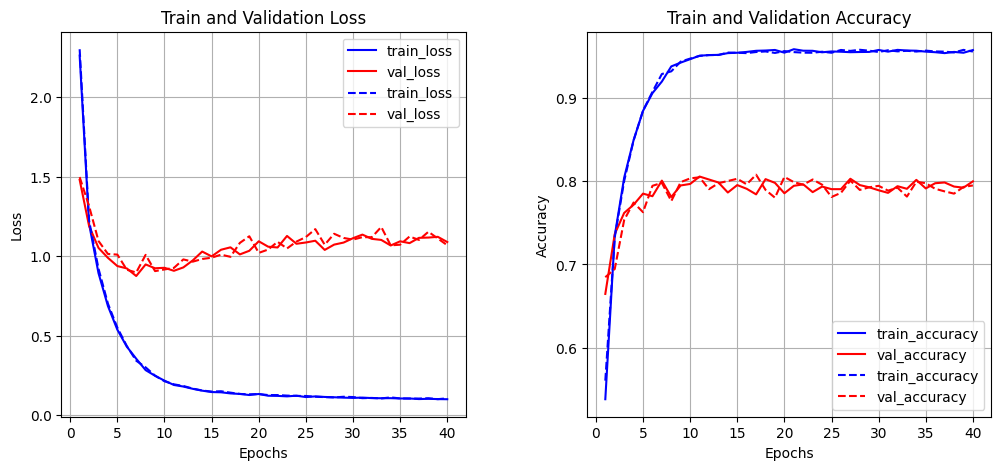

In [26]:
# [play ground]
# 이번 build_model() 함수의 인자는 각각 가중치 초기화 방법 하나입니다.

your_history = build_model(initializers.VarianceScaling())
diff_history(history, your_history)

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128)              

In [28]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 3s 127ms/step - loss: 1.8459 - accuracy: 0.6452 - val_loss: 3.3586 - val_accuracy: 0.7391
Epoch 2/40
18/18 [==============================] - 2s 99ms/step - loss: 0.6942 - accuracy: 0.8732 - val_loss: 3.1348 - val_accuracy: 0.7418
Epoch 3/40
18/18 [==============================] - 2s 87ms/step - loss: 0.3780 - accuracy: 0.9292 - val_loss: 2.8280 - val_accuracy: 0.7289
Epoch 4/40
18/18 [==============================] - 2s 141ms/step - loss: 0.2455 - accuracy: 0.9467 - val_loss: 2.4727 - val_accuracy: 0.7017
Epoch 5/40
18/18 [==============================] - 2s 104ms/step - loss: 0.1891 - accuracy: 0.9512 - val_loss: 2.1036 - val_accuracy: 0.6923
Epoch 6/40
18/18 [==============================] - 2s 99ms/step - loss: 0.1555 - accuracy: 0.9526 - val_loss: 1.8156 - val_accuracy: 0.6861
Epoch 7/40
18/18 [==============================] - 2s 86ms/step - loss: 0.1375 - accuracy: 0.9548 - val_loss: 1.5708 - val_accuracy: 0.7253
Epoch 8/40

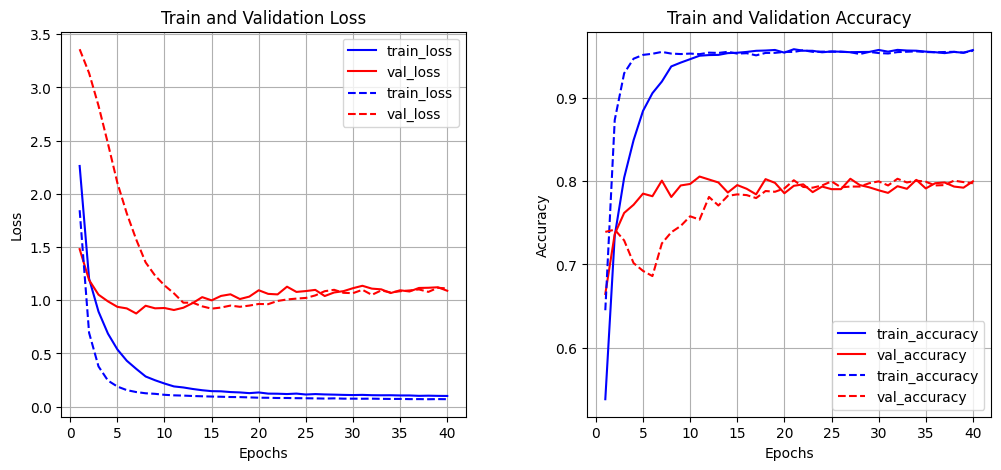

In [29]:
diff_history(history, batch_norm_history)

In [30]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                      

In [31]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 4s 162ms/step - loss: 1.7205 - accuracy: 0.6605 - val_loss: 3.2666 - val_accuracy: 0.7306
Epoch 2/40
18/18 [==============================] - 2s 110ms/step - loss: 0.5478 - accuracy: 0.9045 - val_loss: 3.1686 - val_accuracy: 0.7498
Epoch 3/40
18/18 [==============================] - 2s 85ms/step - loss: 0.3035 - accuracy: 0.9427 - val_loss: 2.9992 - val_accuracy: 0.7551
Epoch 4/40
18/18 [==============================] - 2s 98ms/step - loss: 0.2318 - accuracy: 0.9486 - val_loss: 2.7962 - val_accuracy: 0.7444
Epoch 5/40
18/18 [==============================] - 2s 88ms/step - loss: 0.1929 - accuracy: 0.9501 - val_loss: 2.6407 - val_accuracy: 0.7560
Epoch 6/40
18/18 [==============================] - 2s 85ms/step - loss: 0.1618 - accuracy: 0.9520 - val_loss: 2.2929 - val_accuracy: 0.7573
Epoch 7/40
18/18 [==============================] - 2s 89ms/step - loss: 0.1538 - accuracy: 0.9510 - val_loss: 2.1118 - val_accuracy: 0.7618
Epoch 8/40


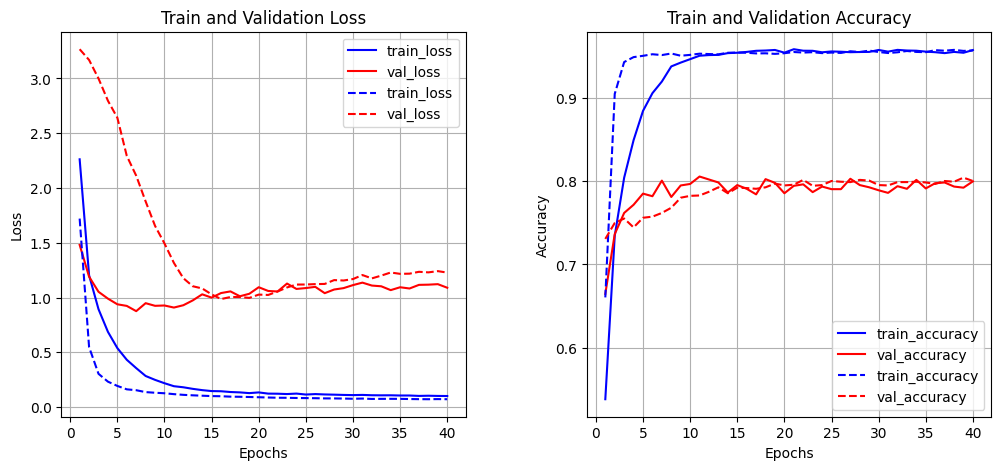

In [32]:
diff_history(history, orderd_bn_history)